In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/src/'
sys.path.insert(0, src_dir)

In [4]:
verbose = True
run_mode = 'debug'
from prototype_GRB_population import *

18:21:04.992 [DEBUG] Root directory is /Users/palmerio/Science_projects/GRB_population_model
18:21:04.992 [DEBUG] Directory paths :
    'root'    : /Users/palmerio/Science_projects/GRB_population_model
    'obs'     : /Users/palmerio/Science_projects/GRB_population_model/observational_constraints
    'init'    : /Users/palmerio/Science_projects/GRB_population_model/init
    'output'  : /Users/palmerio/Science_projects/GRB_population_model/model_outputs
    'data'    : /Users/palmerio/Science_projects/GRB_population_model/data
    'cosmo'   : /Users/palmerio/Science_projects/GRB_population_model/data/cosmology
    'ECLAIRs' : /Users/palmerio/Science_projects/GRB_population_model/data/ECLAIRs
18:21:04.993 [DEBUG] File paths :
    'config'  : /Users/palmerio/Science_projects/GRB_population_model/init/config.yml
    'param'   : /Users/palmerio/Science_projects/GRB_population_model/init/parameters.yml
    'instrum' : /Users/palmerio/Science_projects/GRB_population_model/init/instruments.yml

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import logging
import time
import sys
import seaborn as sns
import pandas as pd
import physics as ph
import io_grb_pop as io
import miscelaneous as msc
import observational_constraints as obs
from GRB_population import GRBPopulation
from cosmology import init_cosmology
from ECLAIRs import init_ECLAIRs
from stats import MonteCarlo_routine

In [6]:
io.create_output_dir(paths_to_dir, dir_name=config['output_dir'],
                             run_mode=run_mode)
np.random.seed(0)
tstart = time.time()
GRB_population = GRBPopulation(Nb_GRBs, output_dir=paths_to_dir['output'])
GRB_prop = GRB_population.draw_GRB_properties(cosmo=cosmo, params=params)

ph.calc_peak_photon_flux(GRB_prop, incl_instruments, ECLAIRs_prop)
ph.calc_peak_energy_flux(GRB_prop, incl_instruments, ECLAIRs_prop)
ph.calc_photon_fluence(GRB_prop, incl_instruments)
ph.calc_energy_fluence(GRB_prop, incl_instruments)
ph.calc_det_prob(GRB_prop, incl_samples, **ECLAIRs_prop)

df = pd.DataFrame(GRB_prop)

18:21:05.301 [INFO] Output directory updated to /Users/palmerio/Science_projects/GRB_population_model/model_outputs/191202_ECLAIRs_best_A
18:21:06.096 [DEBUG] Starting calculations of peak photon fluxes...
18:21:06.096 [DEBUG] For BATSE instrument [50.0, 300.0 keV]:
18:21:16.167 [DEBUG] Done in 10.070 s
18:21:16.167 [DEBUG] For BAT instrument [15.0, 150.0 keV]:
18:21:26.032 [DEBUG] Done in 9.865 s
18:21:26.033 [DEBUG] For ECLAIRs instrument [4.0, 150.0 keV]:
18:21:44.291 [DEBUG] Done in 18.257 s
18:21:44.291 [DEBUG] Starting calculations of peak energy fluxes...
18:21:44.292 [DEBUG] For BATSE instrument [50.0, 300.0 keV]:
18:21:53.624 [DEBUG] Done in 9.332 s
18:21:53.625 [DEBUG] For BAT instrument [15.0, 150.0 keV]:
18:22:03.055 [DEBUG] Done in 9.429 s
18:22:03.055 [DEBUG] For ECLAIRs instrument [4.0, 150.0 keV]:
18:22:21.433 [DEBUG] Done in 18.378 s
18:22:21.434 [DEBUG] Starting calculations of photon fluences...
18:22:21.442 [DEBUG] Starting calculations of energy fluences...
18:22:2

In [7]:
df.columns

,Nb_GRBs,z,L,Ep,t90obs,Cvar,alpha,beta,ktild,D_L,...,pht_flnc_ECLAIRs,erg_flnc_BATSE,erg_flnc_BAT,erg_flnc_ECLAIRs,pdet_Stern,pdet_EpGBM,pdet_Swift,pdet_ECLAIRs_tot,pdet_ECLAIRs_pht_flnc,pdet_ECLAIRs_pht_cts
0,1000000,2.488,1.869734e+51,343.020526,16.148514,0.184190,0.354681,2.13240,0.586803,20580.690742,...,117.324578,2.053342e-08,1.901250e-08,0.000007,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1000000,3.057,5.590247e+52,1888.319092,105.298439,0.169977,0.253191,2.08491,0.441418,26443.739383,...,1049.211902,6.596060e-07,2.879599e-07,0.000096,1.0,0.0,0.0,0.000000,0.000000,0.000000
2,1000000,2.645,4.500167e+51,795.630080,42.227081,0.292840,0.739584,2.27148,0.670989,22177.953974,...,1062.317803,2.538061e-07,1.827642e-07,0.000067,1.0,0.0,0.0,0.000000,0.000000,0.000000
3,1000000,2.477,2.678469e+50,404.617308,97.205906,0.097352,0.812977,2.58927,0.952697,20469.423445,...,170.160332,2.295423e-08,2.291078e-08,0.000009,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,1000000,2.185,6.119529e+51,1181.222237,51.120047,0.152376,0.625481,3.39893,1.598989,17549.217070,...,1450.422785,5.320502e-07,3.001524e-07,0.000106,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000000,1.091,1.609576e+51,1101.593049,15.636536,0.258639,0.790447,2.18559,0.480636,7397.508435,...,353.008779,1.181678e-07,6.668690e-08,0.000024,1.0,0.0,0.0,0.000000,0.000000,0.000000
999996,1000000,1.574,1.555508e+52,76.876944,80.573386,0.475080,0.642680,2.34728,0.883139,11690.892985,...,228189.959706,9.617794e-06,1.584574e-05,0.007692,1.0,1.0,1.0,0.959954,0.959954,0.873395
999997,1000000,2.047,1.506011e+52,3165.143191,34.012936,0.514009,0.268851,2.55793,1.799872,16193.518936,...,876.932121,7.027120e-07,2.561495e-07,0.000084,1.0,0.0,0.0,0.000000,0.000000,0.000000
999998,1000000,2.402,9.969869e+51,566.339559,33.143948,0.137126,0.606163,2.89143,1.460425,19713.123590,...,2375.644324,5.264829e-07,4.170934e-07,0.000154,1.0,0.0,1.0,0.232499,0.124929,0.232499


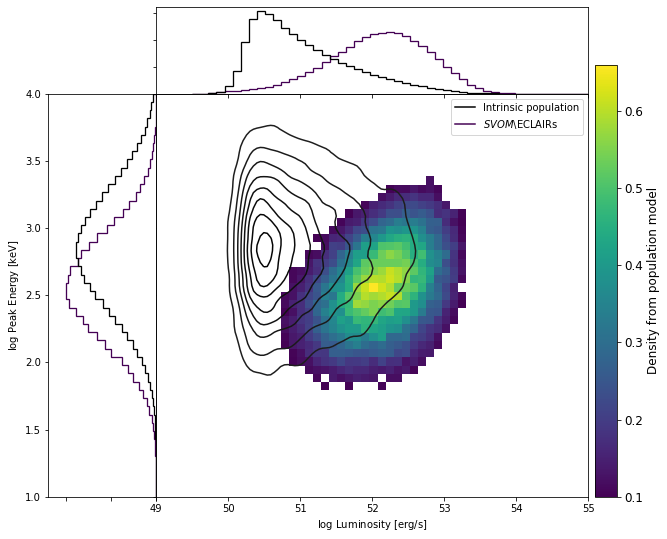

In [8]:
fig, axes = obs.fig_marg_cb(figsize=(10,8))
# mini_cbax = fig.add_axes([0.780, 0.125, 0.015, 0.20])
bins_L = np.linspace(49.5,55, 50)
bins_Ep = np.linspace(1., 4., 50)
Npop=50000
bins_L_mid = 0.5*(bins_L[1:]+bins_L[:-1])
bins_Ep_mid = 0.5*(bins_Ep[1:]+bins_Ep[:-1])
delta_bin_Ep = (bins_Ep_mid[1]-bins_Ep_mid[0])
delta_bin_L  = (bins_L_mid[1]-bins_L_mid[0])
hist_EpL,_,_, cs = axes['center'].hist2d(np.log10(df['L']), np.log10(df['Ep']), bins=[bins_L, bins_Ep],
                           weights=df['pdet_ECLAIRs_tot'], density=True,
                           label=r'$SVOM$/ECLAIRs')
cs.cmap.set_under('w')
cs.cmap.set_over('k')
cs.set_clim(0.1, hist_EpL.max())
cb = fig.colorbar(cs, cax=axes['cb'])
cb.set_label('Density from population model', **{'size':12})
cb.ax.tick_params(labelsize=12)
sns.kdeplot(data=np.log10(df['L'][:Npop]), 
            data2=np.log10(df['Ep'][:Npop]), 
            ax=axes['center'],
            label='Intrinsic population', color='k')

axes['left'].hist(np.log10(df['Ep']), weights=df['pdet_ECLAIRs_tot'], bins=bins_Ep, density=True,
                  histtype='step', linewidth=1.3, color=cs.cmap(0),
                 orientation='horizontal')
axes['top'].hist(np.log10(df['L']), weights=df['pdet_ECLAIRs_tot'], bins=bins_L, density=True,
                histtype='step', linewidth=1.3, color=cs.cmap(0))
axes['left'].hist(np.log10(df['Ep']), bins=bins_Ep, density=True,
                  histtype='step', linewidth=1.3, color='k',
                 orientation='horizontal')
axes['top'].hist(np.log10(df['L']), bins=bins_L, density=True,
                histtype='step', linewidth=1.3, color='k')


# sns.kdeplot(np.log10(df['L'][:Npop]), ax=axes['top'], color='k', legend=False)
# sns.kdeplot(np.log10(df['Ep'][:Npop]), ax=axes['left'], color='k', legend=False, vertical=True)
# axes['left'].invert_xaxis()


axes['left'].set_ylabel(r'log Peak Energy $\rm{[keV]}$')
axes['center'].set_xlabel(r'log Luminosity $\rm{[erg/s]}$')
axes['center'].set_xlim(49,55)
axes['center'].set_ylim(1, 4)
axes['left'].set_xlim(1.2, 0)
axes['center'].plot([],[], label=r'$SVOM$\ECLAIRs', color=cs.cmap(0))
leg = axes['center'].legend(loc='upper right')

axes['center'].tick_params(axis='y', which='both', left='off')
axes['left'].tick_params(axis='x', which='both', bottom='off')
axes['top'].tick_params(axis='both', which='both', left='off', bottom='off')
plt.setp(axes['center'].get_yticklabels(), visible=False)
plt.setp(axes['left'].get_xticklabels(), visible=False)
plt.setp(axes['top'].get_xticklabels(), visible=False)
plt.setp(axes['top'].get_yticklabels(), visible=False)
# fig.savefig(paths_to_dir['output']/'EpL_SVOM_A.pdf')


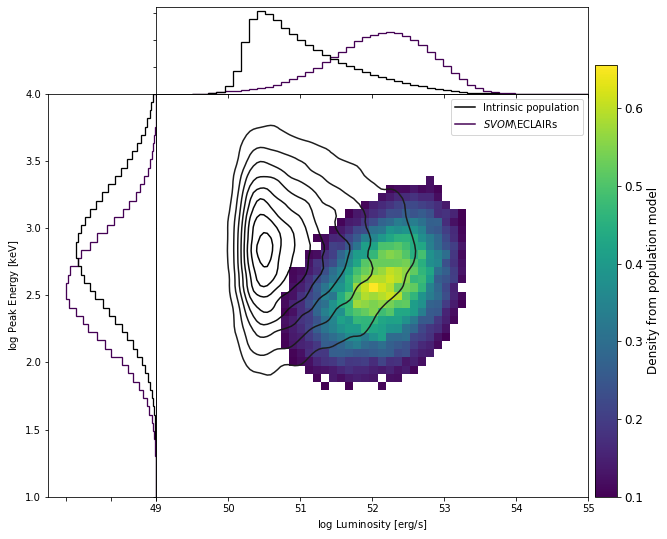

In [10]:
fig, axes = obs.fig_marg_cb(figsize=(10,8))
# mini_cbax = fig.add_axes([0.780, 0.125, 0.015, 0.20])
bins_L = np.linspace(49.5,55, 50)
bins_Ep = np.linspace(1., 4., 50)
Npop=50000
bins_L_mid = 0.5*(bins_L[1:]+bins_L[:-1])
bins_Ep_mid = 0.5*(bins_Ep[1:]+bins_Ep[:-1])
delta_bin_Ep = (bins_Ep_mid[1]-bins_Ep_mid[0])
delta_bin_L  = (bins_L_mid[1]-bins_L_mid[0])
hist_EpL,_,_, cs = axes['center'].hist2d(np.log10(df['L']), np.log10(df['Ep']), bins=[bins_L, bins_Ep],
                           weights=df['pdet_ECLAIRs_pht_flnc'], density=True,
                           label=r'$SVOM$/ECLAIRs')
cs.cmap.set_under('w')
cs.cmap.set_over('k')
cs.set_clim(0.1, hist_EpL.max())
cb = fig.colorbar(cs, cax=axes['cb'])
cb.set_label('Density from population model', **{'size':12})
cb.ax.tick_params(labelsize=12)
sns.kdeplot(data=np.log10(df['L'][:Npop]), 
            data2=np.log10(df['Ep'][:Npop]), 
            ax=axes['center'],
            label='Intrinsic population', color='k')

axes['left'].hist(np.log10(df['Ep']), weights=df['pdet_ECLAIRs_pht_flnc'], bins=bins_Ep, density=True,
                  histtype='step', linewidth=1.3, color=cs.cmap(0),
                 orientation='horizontal')
axes['top'].hist(np.log10(df['L']), weights=df['pdet_ECLAIRs_pht_flnc'], bins=bins_L, density=True,
                histtype='step', linewidth=1.3, color=cs.cmap(0))
axes['left'].hist(np.log10(df['Ep']), bins=bins_Ep, density=True,
                  histtype='step', linewidth=1.3, color='k',
                 orientation='horizontal')
axes['top'].hist(np.log10(df['L']), bins=bins_L, density=True,
                histtype='step', linewidth=1.3, color='k')


# sns.kdeplot(np.log10(df['L'][:Npop]), ax=axes['top'], color='k', legend=False)
# sns.kdeplot(np.log10(df['Ep'][:Npop]), ax=axes['left'], color='k', legend=False, vertical=True)
# axes['left'].invert_xaxis()


axes['left'].set_ylabel(r'log Peak Energy $\rm{[keV]}$')
axes['center'].set_xlabel(r'log Luminosity $\rm{[erg/s]}$')
axes['center'].set_xlim(49,55)
axes['center'].set_ylim(1, 4)
axes['left'].set_xlim(1.2, 0)
axes['center'].plot([],[], label=r'$SVOM$\ECLAIRs', color=cs.cmap(0))
leg = axes['center'].legend(loc='upper right')

axes['center'].tick_params(axis='y', which='both', left='off')
axes['left'].tick_params(axis='x', which='both', bottom='off')
axes['top'].tick_params(axis='both', which='both', left='off', bottom='off')
plt.setp(axes['center'].get_yticklabels(), visible=False)
plt.setp(axes['left'].get_xticklabels(), visible=False)
plt.setp(axes['top'].get_xticklabels(), visible=False)
plt.setp(axes['top'].get_yticklabels(), visible=False)
# fig.savefig(paths_to_dir['output']/'EpL_SVOM_A.pdf')

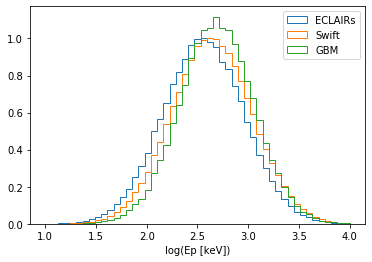

In [9]:
plt.hist(np.log10(df['Ep']), weights=df['pdet_ECLAIRs_tot'], label='ECLAIRs',
         density=True, bins=bins_Ep, histtype='step')
plt.hist(np.log10(df['Ep']), weights=df['pdet_Swift'], label='Swift',
         density=True, bins=bins_Ep, histtype='step')
plt.hist(np.log10(df['Ep']), weights=df['pdet_EpGBM'], label='GBM',
         density=True, bins=bins_Ep, histtype='step')
plt.legend()
plt.xlabel('log(Ep [keV])')
plt.savefig(paths_to_dir['output']/'Ep_distr.pdf')

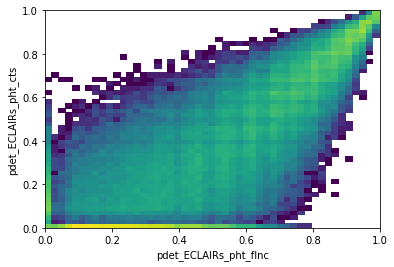

In [29]:
mask = (df['pdet_ECLAIRs_pht_flnc'] > 0) | (df['pdet_ECLAIRs_pht_cts'] > 0)
norm = matplotlib.colors.LogNorm()
bins_pdet = np.linspace(0.,1., 50)
plt.hist2d(df[mask]['pdet_ECLAIRs_pht_flnc'],df[mask]['pdet_ECLAIRs_pht_cts'], bins=[bins_pdet,bins_pdet],
           density=True, norm=norm)
plt.xlabel('pdet_ECLAIRs_pht_flnc')
plt.ylabel('pdet_ECLAIRs_pht_cts')
plt.show()